In [84]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [85]:
df = pd.read_csv("salary_data_cleaned.csv")
df

,Job Title,Company Name,Rating,Job Description,size,founded,type,industry,sector,revenue,...,java,javascript,sql,excel,spark,aws,azure,job_simp,seniority,desc_len
0,"Front End Engineer, MADS- Measurement and Data...",Amazon.com Services LLC,3.8,Professional non-internship experience with fr...,10000+ Employees,1994,Company - Public,Internet & Web Services,Information Technology,$10+ billion (USD),...,1,1,0,0,0,0,0,na,na,2108
1,Jr. Data Scientist,Net2Aspire LLC,-1.0, Apply Statistical and Machine Learning metho...,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,data scientist,jr,855
2,Healthcare Data Scientist,Humbi Health LLC,-1.0,Humbi Health is looking for highly analytical ...,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,data scientist,na,1157
3,"CO-OP, DATA SCIENCE",PUMA,4.0,"INTERNS\nCO-OP, DATA SCIENCE\nSomerville, Mass...",10000+ Employees,1948,Company - Private,"Department, Clothing & Shoe Stores",Retail & Wholesale,$5 to $10 million (USD),...,0,0,0,0,0,0,0,na,na,494
4,Data Science Contractor,Rhythm Energy Inc,3.4,Data Science Contracting Opportunities\nAbout ...,1 to 50 Employees,Unknown,Unknown / Non-Applicable,-1,-1,-1,...,0,0,0,1,0,0,0,na,na,863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,STATISTICAL ASSISTANT,UTOFUN,4.1,Overview\nThe UTOFUN is the leading internet s...,1 to 50 Employees,Company - Private,Unknown / Non-Applicable,-1,-1,-1,...,0,0,0,0,0,0,0,na,na,1221
478,2022 Graduate Fellow Data Science Co-op,Merck,4.1,Job Description\nNew hires in office-based rol...,10000+ Employees,1891,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$10+ billion (USD),...,0,0,0,0,0,0,0,na,na,957
479,Student Employee - Data Science,Electric Power Research Institute,5.0,Job Title:\nStudent Employee - Data Science\nL...,Unknown,Company - Private,Unknown / Non-Applicable,-1,-1,-1,...,0,0,0,0,0,0,0,na,na,639
480,Data Analyst,Hulu,3.9,We are seeking a Data Analyst who will focus o...,1001 to 5000 Employees,2007,Company - Private,Broadcast Media,Media & Communication,$1 to $2 billion (USD),...,0,0,0,0,0,0,0,analyst,na,915


In [44]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'research' in title.lower():
        return 'researcher'
    else:
        return 'na'

        

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'head' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'mid'

In [86]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()


data scientist    279
na                 80
analyst            73
data engineer      22
researcher         19
mle                 9
Name: job_simp, dtype: int64

In [87]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

mid    455
jr      27
Name: seniority, dtype: int64

In [47]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0       133
1       697
2      2108
3       855
4      1157
       ... 
495    1221
496     957
497     639
498     915
499    1536
Name: desc_len, Length: 500, dtype: int64

In [48]:
df.salary

0        75.00 
1        75.00 
2       93,800 
3       82,500 
4      175,000 
         ...   
495     37,070 
496     83,375 
497     75,720 
498     87,765 
499    129,369 
Name: salary, Length: 500, dtype: object

In [64]:
df.columns

Index(['Job Title', 'Company Name', 'Location', 'Salary Estimate', 'Rating',
       'Job Description', 'size', 'founded', 'type', 'industry', 'sector',
       'revenue', 'hourly', 'salary', 'job_state', 'python_yn', 'Java_yn',
       'Rlang_yn', 'JS_yn', 'SQL_yn', 'Excel_yn', 'Spark_yn', 'AWS_yn',
       'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [50]:
#eliminate the hourly estimate jobs
df = df[df["hourly"] == 0]
#eliminate the coma (,)  
df["salary"] = df["salary"].apply(lambda x : x.replace(',','' ))
# transform salary column to numeric
df["salary"] = pd.to_numeric(df["salary"])
#view the value counts
df["salary"].value_counts() 

/var/folders/n2/np9y87ks47j0gqm4v82gvddh0000gn/T/ipykernel_16178/2880199962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = df["salary"].apply(lambda x : x.replace(',','' ))
/var/folders/n2/np9y87ks47j0gqm4v82gvddh0000gn/T/ipykernel_16178/2880199962.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"] = pd.to_numeric(df["salary"])


67515     22
87202     19
77587     17
87765     16
105886    16
          ..
88274      1
70142      1
113592     1
108800     1
98818      1
Name: salary, Length: 68, dtype: int64

In [109]:
df["founded"].value_counts()

Company - Private         43
-1                        34
1975                      27
1971                      25
1948                      20
2007                      19
2015                      15
2004                      15
1850                      13
Company - Public          13
1994                      13
1902                      13
2008                      13
1891                      12
2006                      12
1911                      11
2003                      10
1908                      10
2002                       9
2016                       9
2005                       8
1884                       8
1855                       8
1811                       8
2013                       8
1998                       7
2011                       7
2017                       7
1799                       7
1764                       7
1961                       5
1950                       5
1967                       5
1852                       5
Unknown       

In [95]:
df["size"].value_counts()

10000+ Employees           207
1001 to 5000 Employees      80
1 to 50 Employees           59
51 to 200 Employees         37
-1                          34
Unknown                     29
5001 to 10000 Employees     19
201 to 500 Employees        13
501 to 1000 Employees        4
Name: size, dtype: int64

In [98]:
def company_size_simplifier(size):
    if "1 to 50 Employees" == size or "51 to 200 Employees" == size:
        return 'small'
    elif '201 to 500 Employees' == size:
        return 'medium'
    elif "501 to 1000 Employees" == size or'1001 to 5000 Employees' == size:
        return 'big'
    elif '10000+ Employees' == size:
        return 'super_big'
    else:
        return 'unknown'

In [99]:
df["size_simp"] = df["size"].apply(company_size_simplifier)
df["size_simp"].value_counts() 

super_big    207
small         96
big           84
unknown       82
medium        13
Name: size_simp, dtype: int64

In [103]:
df[df["size_simp"] == "small"]["salary"].mean()

80265.32291666667

In [104]:
df[df["size_simp"] == "medium"]["salary"].mean()

106690.53846153847

In [106]:
df[df["size_simp"] == "big"]["salary"].mean()

88859.88095238095

In [107]:
df[df["size_simp"] == "super_big"]["salary"].mean()


93246.9420289855

In [108]:
df[df["size_simp"] == "unknown"]["salary"].mean()


88373.40243902439

In [88]:
df.describe()

,Rating,salary,python,java,javascript,sql,excel,spark,aws,azure,desc_len
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,3.486722,89430.319502,0.047718,0.066390,0.045643,0.026971,0.074689,0.018672,0.010373,0.058091,1108.912863
std,1.452144,22930.118152,0.213390,0.249221,0.208927,0.162167,0.263162,0.135505,0.101426,0.234159,623.963277
min,-1.000000,37070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
25%,3.600000,75000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,718.500000
50%,3.900000,88607.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1063.000000
75%,4.200000,105886.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1350.000000
max,5.000000,175000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4608.000000


### con los datos que tenemos que preguntas se harian?


### 1. como es la distribucion de calificaciones en los trabajos remotos?

<AxesSubplot:>

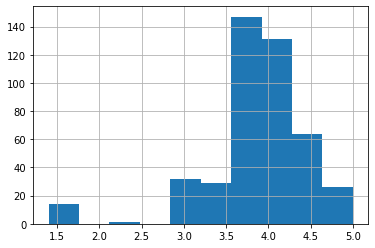

In [110]:
df[df["Rating"] != -1].Rating.hist()

<AxesSubplot:>

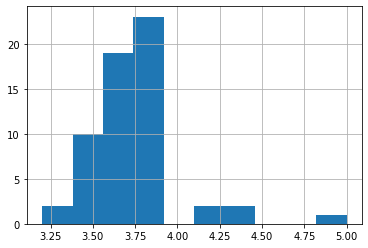

In [111]:
df[(df["job_state"] == "Remote") & (df["Rating"] != -1) ].Rating.hist()


### 2. como es la distribucion de salarios en los trabajos remotos?

<AxesSubplot:>

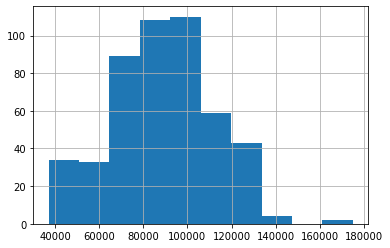

In [57]:
df.salary.hist()

<AxesSubplot:>

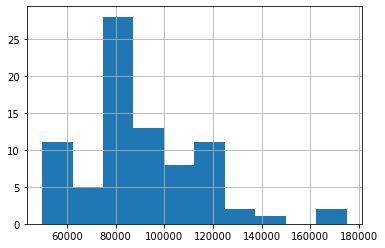

In [60]:
df[df["job_state"] == "Remote"].salary.hist()

<AxesSubplot:>

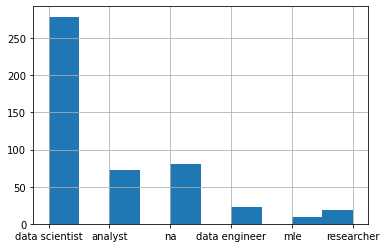

In [112]:
df.job_simp.hist()

<AxesSubplot:>

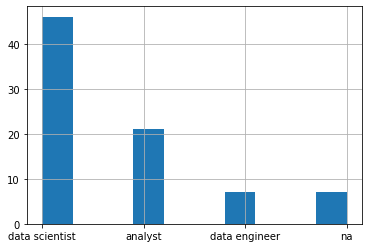

In [113]:
df[df["job_state"] == "Remote"].job_simp.hist()

<AxesSubplot:>

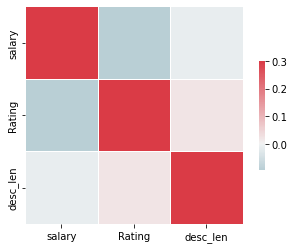

In [66]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['salary','Rating','desc_len',]].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
# selecciono las columnas categoricas de mi preferencia:
df_cat = df[[ 'size','founded', 'type', "industry", 'sector', 'revenue','Company Name', 'job_state', 'python_yn', 'Java_yn',
       'SQL_yn', 'AWS_yn', 'Excel_yn', 'job_simp', 'seniority']]

graph for size: total = 9


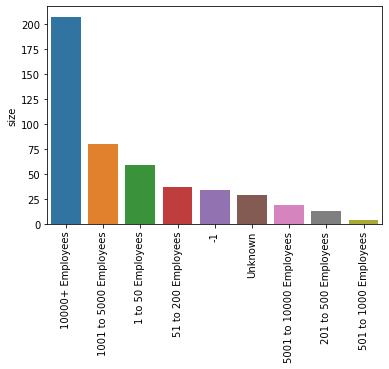

graph for founded: total = 60


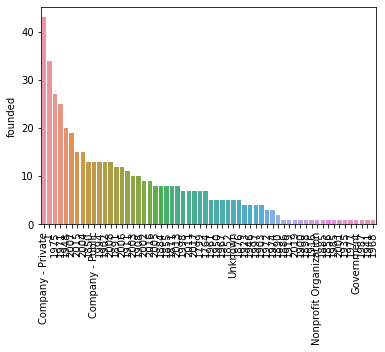

graph for type: total = 16


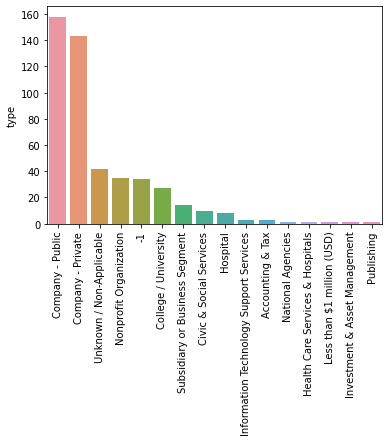

graph for industry: total = 40


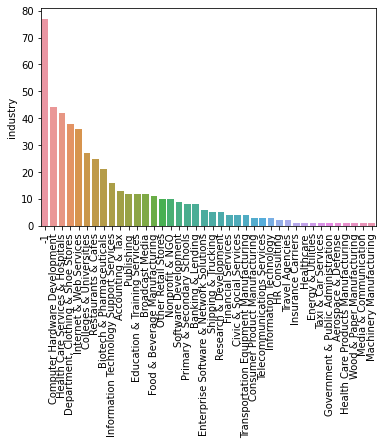

graph for sector: total = 24


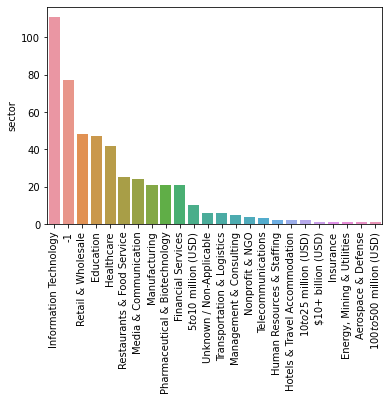

graph for revenue: total = 12


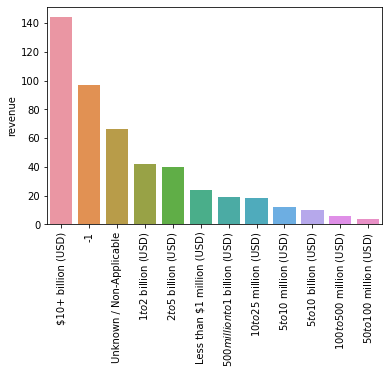

graph for Company Name: total = 86


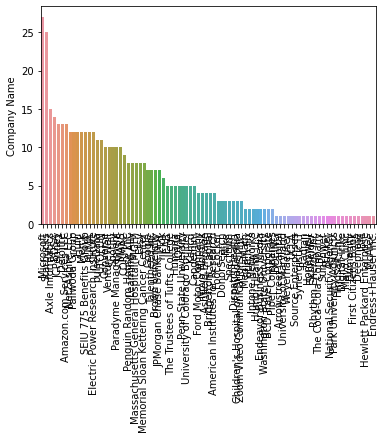

graph for job_state: total = 24


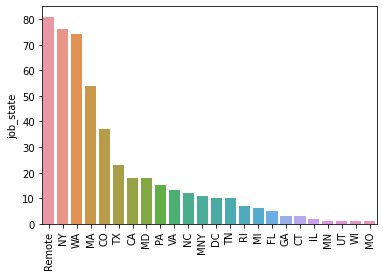

graph for python_yn: total = 2


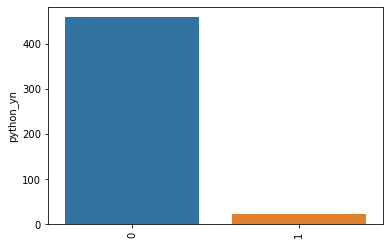

graph for Java_yn: total = 2


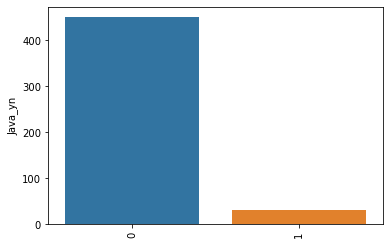

graph for SQL_yn: total = 2


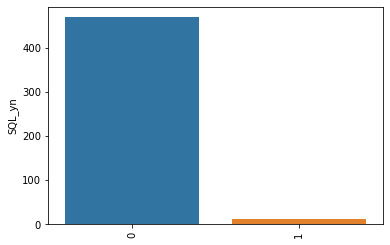

graph for AWS_yn: total = 2


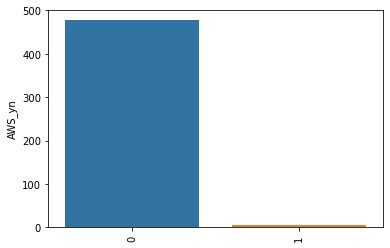

graph for Excel_yn: total = 2


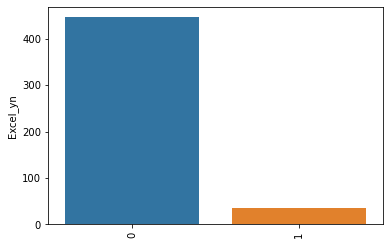

graph for job_simp: total = 6


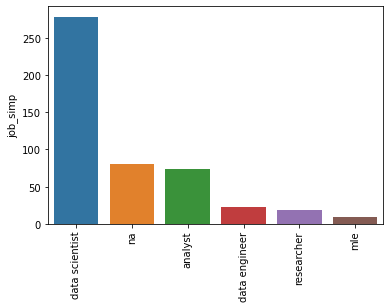

graph for seniority: total = 2


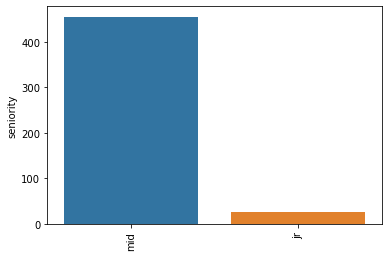

In [76]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [80]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [81]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

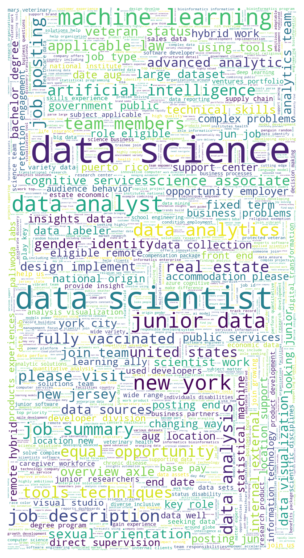

In [83]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()